## Decision Trees
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.tree import export_graphviz
%matplotlib inline


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

A Single Decision Layer 

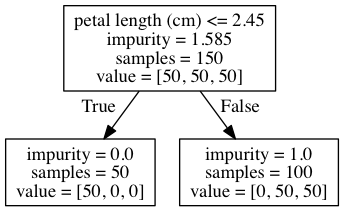

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets

iris = datasets.load_iris()

clf = DecisionTreeClassifier(max_depth=1,criterion="entropy") # construct a decision tree.
clf.fit(iris.data,iris.target)  # train it on the dataset

dot_file = tree.export_graphviz(clf.tree_, out_file='tree_d1.dot', feature_names=iris.feature_names)  #export the tree to .dot file
#dot_file.close() 

import os
os.system('dot tree_d1.dot -Tpng -o tree_d1.png')


from IPython.display import Image
Image(filename='tree_d1.png') 


In [3]:
df=pd.DataFrame(iris.data,columns=(iris.feature_names))
target = pd.DataFrame(iris.target,columns=(['target']))
df = pd.concat([df, target], axis=1)
target_names=dict(zip(range(len(iris.target_names)),iris.target_names))
df['target_names']=df['target'].map(target_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


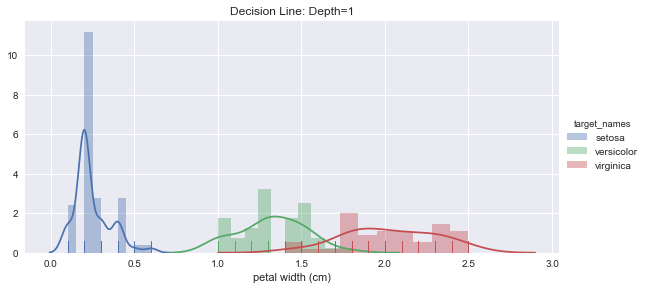

In [4]:
sns.set()
g=sns.FacetGrid(df,hue='target_names',size=4,aspect=2).map(sns.distplot,'petal width (cm)',bins=10,kde='True',rug='True').add_legend()
g.set_xlabels('petal width (cm)')
sns.plt.title('Decision Line: Depth=1')

#sns.set_style({'axes.grid' : False})

Second Decision Layer

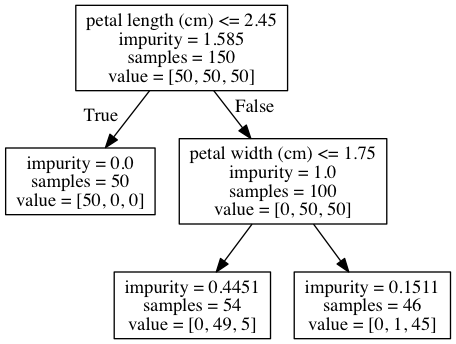

In [5]:
clf=DecisionTreeClassifier(max_depth=2,criterion='entropy') # construct a decision tree with two layers
clf.fit(iris.data,iris.target)
dot_file = tree.export_graphviz(clf.tree_, out_file='tree_d2.dot', feature_names=iris.feature_names)
os.system('dot tree_d2.dot -Tpng -o tree_d2.png')
Image(filename='tree_d2.png')

Third Decision Layer

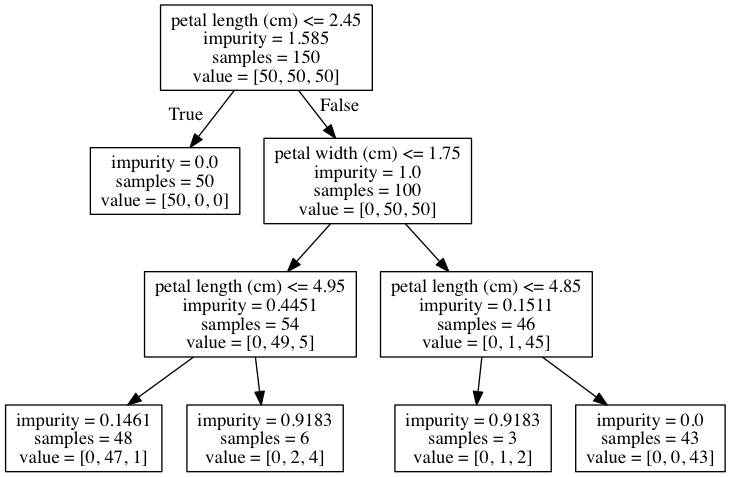

In [6]:
clf=DecisionTreeClassifier(max_depth=3,criterion='entropy') # construct a decision tree with two layers
clf.fit(iris.data,iris.target)
dot_file = tree.export_graphviz(clf.tree_, out_file='tree_d3.dot', feature_names=iris.feature_names)
os.system('dot tree_d3.dot -Tpng -o tree_d3.png')
Image(filename='tree_d3.png')

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

/Users/yangl57/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


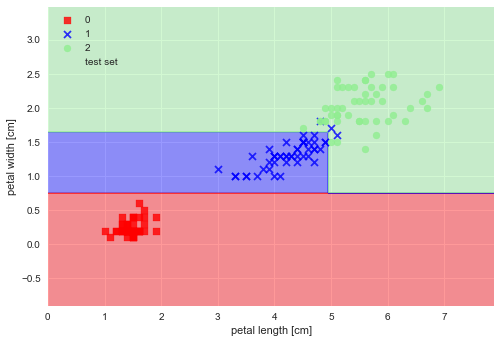

In [8]:
from sklearn.cross_validation import train_test_split
from matplotlib.colors import ListedColormap

X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier(criterion='entropy',
                       max_depth=3, random_state=0)

tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


plot_decision_regions(X_combined, y_combined,
         classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

from sklearn.tree import export_graphviz
export_graphviz(tree,
      out_file='tree3.dot',
      feature_names=['petal length', 'petal width'])

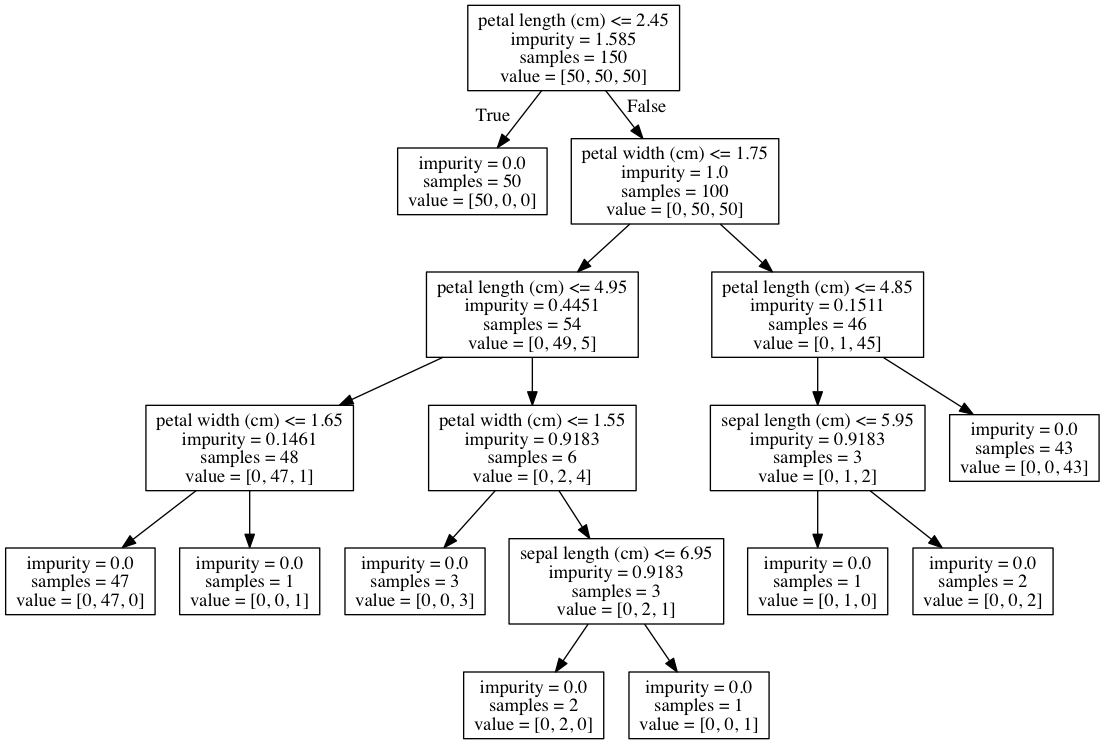

In [14]:
from sklearn import tree
clf=DecisionTreeClassifier(max_depth=5,criterion='entropy') # construct a decision tree with two layers
clf.fit(iris.data,iris.target)
dot_file = tree.export_graphviz(clf.tree_, out_file='tree_d5.dot', feature_names=iris.feature_names)
os.system('dot tree_d5.dot -Tpng -o tree_d5.png')
Image(filename='tree_d5.png')

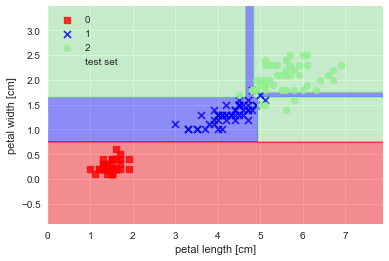

In [15]:
tree = DecisionTreeClassifier(criterion='entropy',
                       max_depth=5, random_state=0)

tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


plot_decision_regions(X_combined, y_combined,
         classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

from sklearn.tree import export_graphviz
export_graphviz(tree,
      out_file='tree5.dot',
      feature_names=['petal length', 'petal width'])

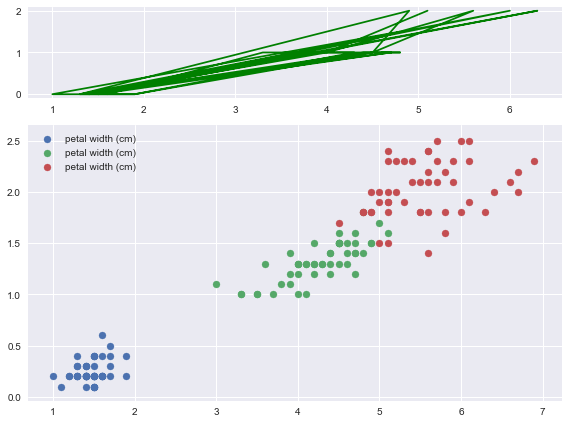

In [31]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import gridspec

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax0 = plt.subplot(gs[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X_train,y_train)  


Y_predict=clf.predict(X_test)


ax0.plot(X_test[:,[0]], Y_predict, '-g')
ax1 = plt.subplot(gs[1])

for spec,data in df.groupby('target_names'):
    ax1.scatter(data['petal length (cm)'], data['petal width (cm)'])
ax1.legend()
        


plt.tight_layout()
plt.show()

In [25]:
X_test

array([[ 5.1,  2.4],
       [ 4. ,  1. ],
       [ 1.4,  0.2],
       [ 6.3,  1.8],
       [ 1.5,  0.2],
       [ 6. ,  2.5],
       [ 1.3,  0.3],
       [ 4.7,  1.5],
       [ 4.8,  1.4],
       [ 4. ,  1.3],
       [ 5.6,  1.4],
       [ 4.5,  1.5],
       [ 4.7,  1.2],
       [ 4.6,  1.5],
       [ 4.7,  1.4],
       [ 1.5,  0.1],
       [ 4.5,  1.5],
       [ 4.4,  1.2],
       [ 1.4,  0.3],
       [ 1.3,  0.4],
       [ 4.9,  2. ],
       [ 4.5,  1.5],
       [ 1.9,  0.2],
       [ 1.4,  0.2],
       [ 4.8,  1.8],
       [ 1. ,  0.2],
       [ 1.9,  0.4],
       [ 4.3,  1.3],
       [ 3.3,  1. ],
       [ 1.6,  0.4]])